In [2]:
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import nbinom
import scipy.stats as stats
path = "../Datos/"
path_fig = "../Figuras/"

In [3]:
#Bose-Einstein 
def f(x,n):
    return n**(x)/((1+n)**(1+x))
#Lineal
def lineal(x,m,b):
    return m*x+b

#Autocorrelación y variante
def autocorr(data):
    result = np.correlate(data,data,mode="full")
    #x_tot = np.concatenate([np.flip(-x),x])
    #return result/np.max(result) 
    return (result[result.size//2:])/(np.max(result[result.size//2:]))

def autocorr_tot(data):
    result = np.correlate(data,data,mode="full")
    #x_tot = np.concatenate([np.flip(-x),x])
    return result/np.max(result) 

def corr(x,data_1,data_2):
    result = np.correlate(data_1,data_2,mode="full")
    x_tot = np.concatenate([np.flip(-x),x])
    return x_tot,result
    # return (result[result.size//2:])/(np.max(result[result.size//2:]))

#Encontrar el valor más cercano 

""" def find_closest_index_min_concise(data, target):
    min_distance = min(abs(value - target) for value in data)
    closest_indices = [i for i, value in enumerate(data) if abs(value - target) == min_distance]
    return min(closest_indices) """


def find_closest_index_min_concise(array, target):
    """
    Find the index of the value in array that is closest to the target.
    
    Parameters:
    array (numpy.ndarray or list): Array of values to search through
    target (float or int): Target value to find closest match for
    
    Returns:
    int: Index of the closest value
    """
    # Convert to numpy array if it's not already
    array = np.asarray(array)
    
    # Calculate the absolute difference between each element and the target
    absolute_diff = np.abs(array - target)
    
    # Return the index of the minimum difference
    return np.argmin(absolute_diff)


def chisqr(obs,exp):
    chisqr = 0
    for i in range(len(obs)):
        if exp[i] == 0:
            pass
        else:
            chisqr = chisqr + ((obs[i]-exp[i])/exp[i])**2
            print(chisqr)
    return chisqr

def chisqr_reduced(obs,exp,param):
    chisqr = 0
    for i in range(len(obs)):
        if exp[i] == 0:
            pass
        else:
            chisqr = chisqr + ((obs[i]-exp[i])/exp[i])**2
            print(chisqr)
            chisqr_reduced = chisqr/(len(obs)-param)
    return chisqr_reduced

def chisqr_error(obs,exp,error):
    chisqr = 0
    for i in range(len(obs)):
        if error[i] ==0:
            pass
        else:
            chisqr = chisqr + ((obs[i]-exp[i])/error[i])**2
            print(chisqr)
    return chisqr


def chisqr_reduced_error(obs,exp,error,param):
    chisqr = 0
    for i in range(len(obs)):
        if error[i] ==0:
            pass
        else:
            chisqr = chisqr + ((obs[i]-exp[i])/error[i])**2
            print(chisqr)
            chisqr_reduced = chisqr/(len(obs)-param)
    return chisqr_reduced

# Cuenta oscura 50 $\Omega$

## Buscar el threshold

In [3]:
#%% 

#Leer datos 

n= 500

file_name = "cuentas_oscuras_50Ohm_10us\\cuenta_oscura_"

data = []

for i in range(n):
    data_i = np.array(np.loadtxt(path + file_name + str(i) + ".txt"))*1000
    data = np.concatenate([data, data_i], axis=0)

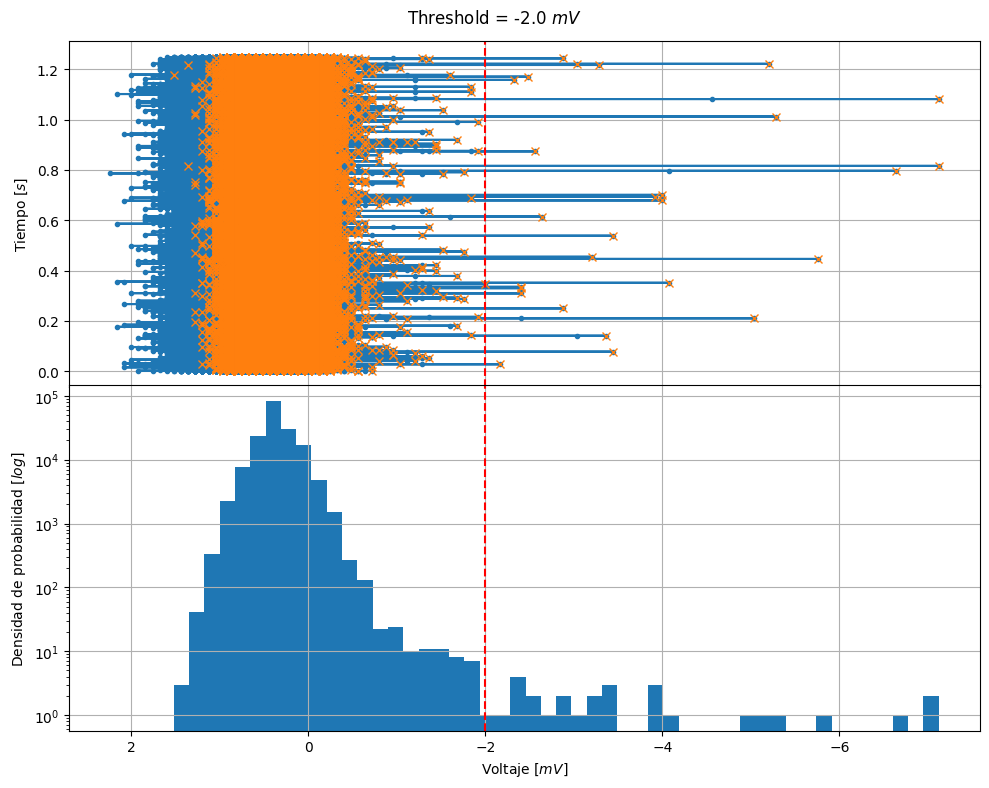

In [ ]:
#%% Buscar el threshold 
x = (np.arange(len(data)))/1000000
index, _ = find_peaks(-data, distance=5)
threshold = np.percentile(-data,1e-3) # .001% de los voltajes están por debajo de este valor 

fig,axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

fig.suptitle("Threshold = %s $mV$"%threshold)

axs[0].plot(data,x, ".-")
axs[0].plot(data[index],x[index], "x")
axs[0].invert_xaxis()
axs[0].set_ylabel(r"Tiempo [$s$]")
axs[0].axvline(threshold,ls="--",color="r")
axs[0].grid()

axs[1].hist(data[index],bins=50)
axs[1].set_yscale("log")
axs[1].set_xlabel(r"Voltaje $[mV]$")
axs[1].set_ylabel(r"Densidad de probabilidad [$log$]")
axs[1].axvline(threshold,ls="--",color="r")
axs[1].grid()

plt.tight_layout(h_pad=-.5)

plt.savefig(path_fig + "Threshold y conteo oscuridad/" + "Cuentas_oscuras.png", bbox_inches ="tight")

# Laser encendido 50 $\Omega$

## Buscar el threshold


In [6]:
#%%
#Leer los datos

n= 1000
file_name = ["Datos 50Ohms 10us 164°\\pantalla_completa_250um_resistencia_50_Ohm_","Datos 50Ohms 10us 180º\\pantalla_completa_180grados_10um_resistencia_50_Ohm_",
             "Datos 50Ohms 10us 194º\\pantalla_completa_mayor_intensidad_10um_resistencia_50_Ohm_","Datos 50Ohms 10us 194º 5V ROTANTE\\pantalla_completa_194grados_Rueda5V_10um_resistencia_50_Ohm_"]


n_file = 0

data = []

for i in range(n):
    data_i = np.array(np.loadtxt(path + file_name[n_file] + str(i) + ".txt"))*1000
    data = np.concatenate([data, data_i], axis=0)

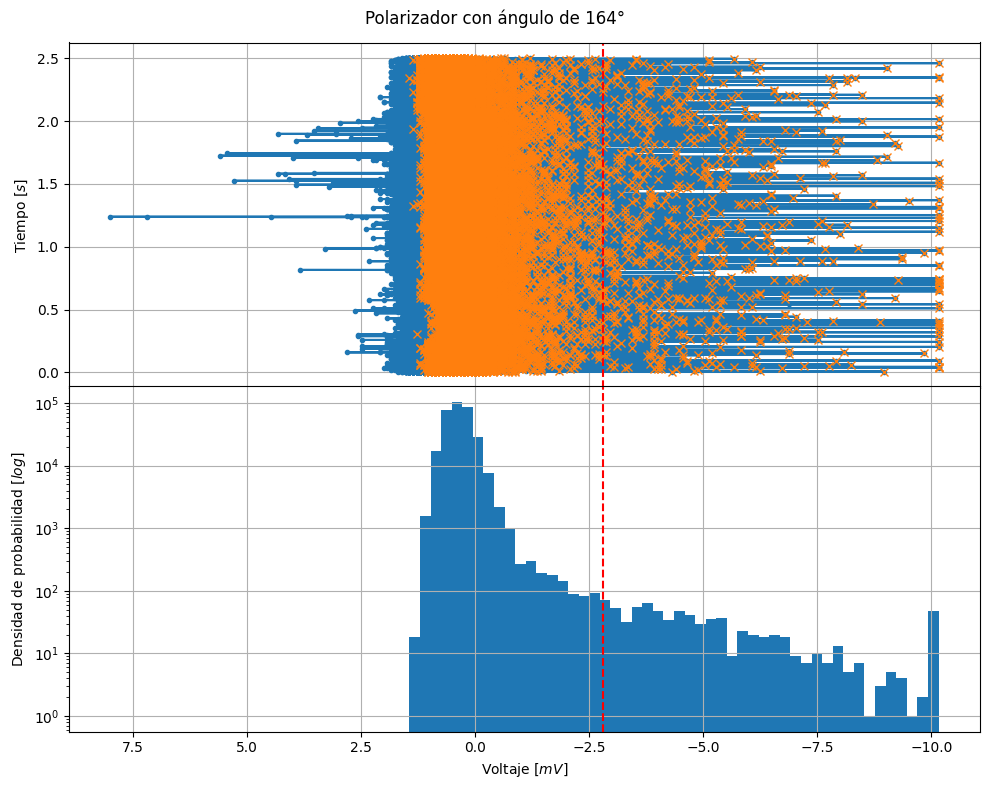

In [7]:
#%% Buscar el threshold 
x = (np.arange(len(data)))/1000000
index, _ = find_peaks(-data, distance=5)
threshold = np.percentile(-data,1e-3) # .001% de los voltajes están por debajo de este valor 

fig,axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

fig.suptitle("Polarizador con ángulo de 164°")

axs[0].plot(data,x, ".-")
axs[0].plot(data[index],x[index], "x")
axs[0].invert_xaxis()
axs[0].set_ylabel(r"Tiempo [$s$]")
axs[0].axvline(threshold,ls="--",color="r")
axs[0].grid()

axs[1].hist(data[index],bins=50)
axs[1].set_yscale("log")
axs[1].set_xlabel(r"Voltaje $[mV]$")
axs[1].set_ylabel(r"Densidad de probabilidad [$log$]")
axs[1].axvline(threshold,ls="--",color="r")
axs[1].grid()

plt.tight_layout(h_pad=-.5)

plt.savefig(path_fig + "Análisis de prueba (primera clase)/" + "Histograma_picos_50ohms_164°.png", bbox_inches ="tight")

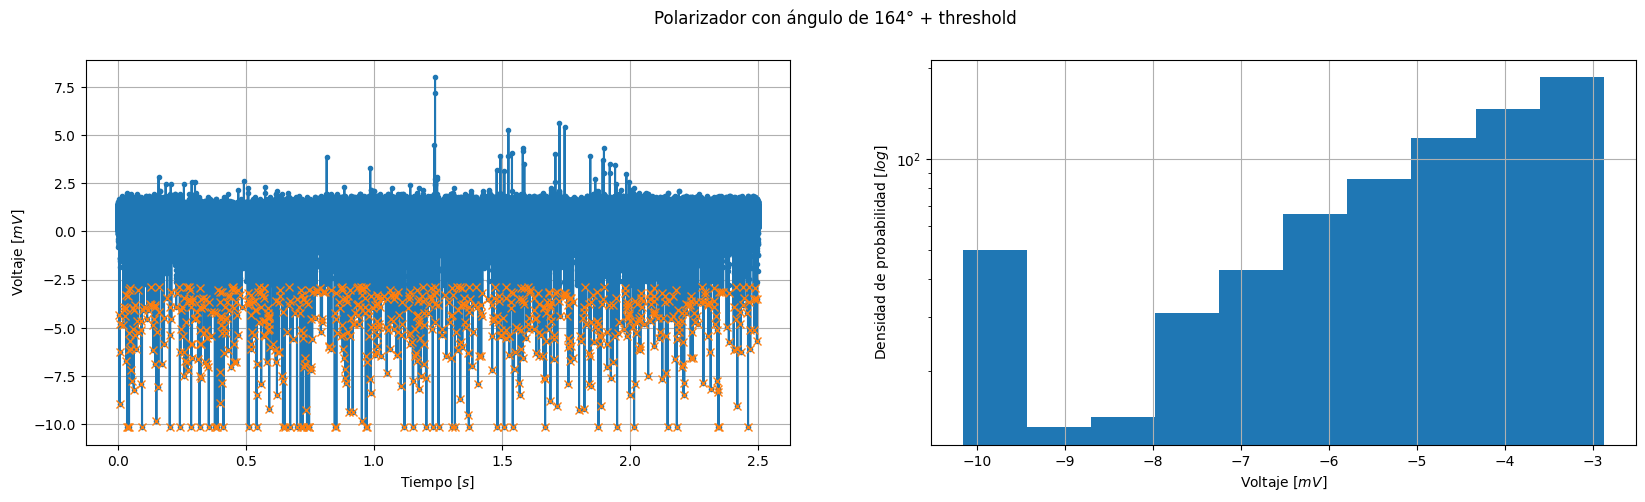

In [9]:
#%% Con threshold 
index, _ = find_peaks(-data, height=-threshold)

fig,axs = plt.subplots(1,2,figsize=(20,5))

fig.suptitle("Polarizador con ángulo de 164° + threshold")

axs[0].plot(x,data, ".-")
axs[0].plot(x[index], data[index], "x")
axs[0].set_ylabel("Voltaje $[mV]$")
axs[0].set_xlabel(r"Tiempo [$s$]")
axs[0].grid()

axs[1].hist(data[index])
axs[1].set_yscale("log")
axs[1].set_xlabel(r"Voltaje $[mV]$")
axs[1].set_ylabel(r"Densidad de probabilidad [$log$]")
axs[1].grid()

plt.savefig(path_fig + "Análisis de prueba (primera clase)/"+"Histograma_picos_con_threshold_50ohms_164°.png",bbox_inches ="tight")

## Distribución de Poisson

### Busco los picos

In [140]:
#%% Leer la cantidad de picos por pantalla 
n= 1000
n_file = 0 #elegir el archivo
n_pantalla = 2 #elegir cuánto de pantalla, completa, 1/2,1/4 o 1/8


folder_name = ["Datos 50Ohms 10us 164°/","Datos 50Ohms 10us 180º/","Datos 50Ohms 10us 194º/"]

file_name = ["pantalla_completa_250um_resistencia_50_Ohm_","pantalla_completa_180grados_10um_resistencia_50_Ohm_",
             "pantalla_completa_mayor_intensidad_10um_resistencia_50_Ohm_"]


n= 500
folder_name = "Datos señal oscura 50Ohm 10us/"
file_name = "pantalla_completa_10um_Señal_oscura"

pantalla = [1,2,4,8]

#umbrales = [3.2]



data = []
cantidad_picos = []
for i in range(100,n):
    data_i = np.array(np.loadtxt(path + folder_name +file_name + str(i) + ".txt"))*1000
    picos_i, _ = find_peaks(-data_i[:int(len(data_i)/pantalla[n_pantalla])],distance=10,height=3.2) 
    cantidad_picos.append(len(picos_i))
print(np.sum(cantidad_picos))

2


2.500036563158472e-07


C:\Users\agus\AppData\Local\Temp\ipykernel_15680\2367501502.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  chisqr_reduced = chisqr/(len(obs)-param)


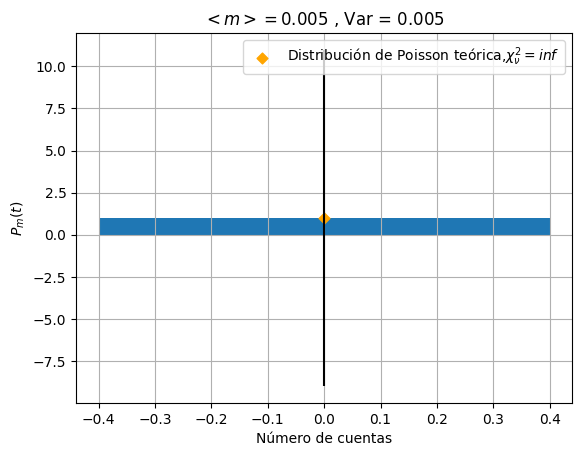

In [141]:
#%% cantidad de picos por pantalla completa analisis POISSON

bins = np.arange(min(cantidad_picos),max(cantidad_picos)+1,1) - 0.5

valor_medio = np.mean(cantidad_picos)
varianza = np.var(cantidad_picos)

#cuentas, _, _ = plt.hist(cantidad_picos,bins=bins,density=True,align ="mid")

cuentas, bins_edges = np.histogram(cantidad_picos, bins=bins, density=True)
x_poisson = np.arange(min(cantidad_picos),max(cantidad_picos),1)
y_poisson = poisson.pmf(x_poisson, valor_medio)
errores_barras = np.sqrt(np.histogram(cantidad_picos, bins=bins)[0])/(np.sum(cantidad_picos)) 

chi_red = chisqr_reduced_error(cuentas,y_poisson,errores_barras,1)
#chi_red = chisqr_reduced(cuentas,y_poisson,1)
plt.figure()
plt.title(r"$< m >= $%s , Var = %s"%(round(valor_medio,3),round(varianza,3)))
plt.bar(x_poisson, cuentas,yerr = errores_barras)
plt.scatter(x_poisson, y_poisson,label=r"Distribución de Poisson teórica,$\chi^2_{\nu} = %s$"%round(chi_red,3),color="orange",marker="D",s=30)
plt.xlabel("Número de cuentas")
plt.ylabel("$P_m (t)$")
plt.grid()
plt.legend()

#plt.savefig(path_fig + "Poisson/" + "Histograma_cuentas_164_completo.png",bbox_inches="tight")

#print(np.std(cantidad_picos)/np.sqrt(np.sum))

In [110]:
np.sum((cuentas-y_poisson)**2/(errores_barras)**2)/(len(cuentas)-1)

6.9528451378859595

### Valor medio de cuentas con respecto a la ventana temporal 

0.004917663336083556
0.043456054845103176
0.074627491912996
0.07685411908058071
0.004917663336083556
0.043456054845103176
0.074627491912996
0.07685411908058071
chi = 0.038427059540290354


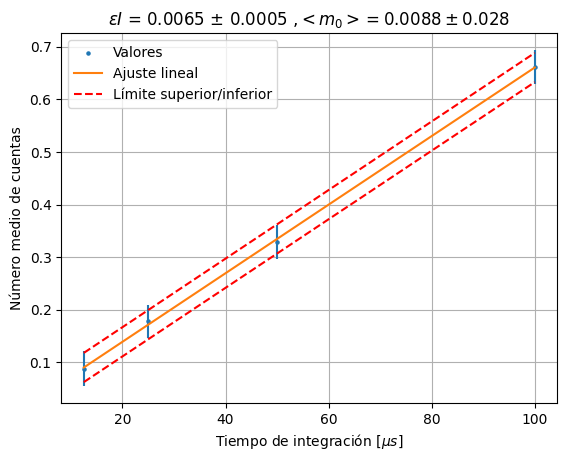

In [14]:
valores_medios = [.088,.178,.329,.662]
errores = [0.03272752525155101,0.031827837437612,0.03208835636148668,0.03194963937501257]
tiempos = np.array([12.5,25,50,100]) 
popt,pcov = curve_fit(lineal,tiempos,valores_medios,sigma=errores,absolute_sigma=True)

chi_red = chisqr_reduced_error(valores_medios,lineal(tiempos,*popt),errores,2)

plt.errorbar(tiempos,valores_medios,yerr = errores,ls="")
plt.scatter(tiempos,valores_medios,s=5,label="Valores")
plt.title(r"$\epsilon I$ = %s $\pm$ %s ,$<m_0> = %s \pm %s$"%(round(popt[0],4),round(np.sqrt(pcov[0][0]),4),round(popt[1],4),round(np.sqrt(pcov[1][1]),3)))
plt.plot(tiempos,lineal(tiempos,*popt),label="Ajuste lineal")
plt.plot(tiempos,lineal(tiempos,popt[0],popt[1]+np.sqrt(pcov[1][1])),ls="--",color="red",label="Límite superior/inferior")
plt.plot(tiempos,lineal(tiempos,popt[0],popt[1]-np.sqrt(pcov[1][1])),ls="--",color="red")
plt.xlabel(r"Tiempo de integración [$\mu s$]")
plt.ylabel("Número medio de cuentas")
plt.grid()
plt.legend(loc=2, prop={'size': 10})

print("chi = " + str(chisqr_reduced_error(valores_medios,lineal(tiempos,*popt),errores,2)))

plt.savefig(path_fig +"Poisson/"+"cuentasvstiempodeintegracion.png",bbox_inches="tight")

## Distribución de Bose-Einstein

#### Correlación de los datos con el disco girando 

##### 5V

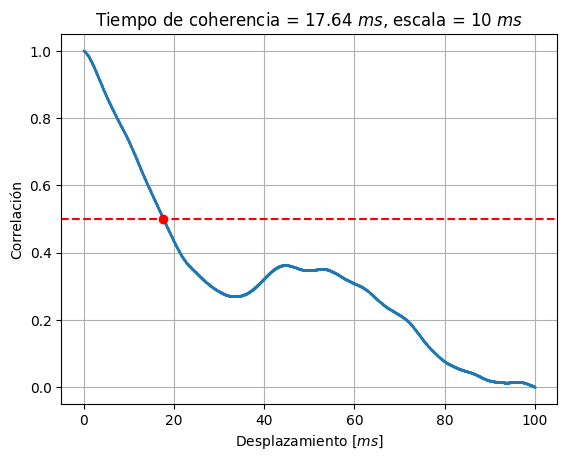

In [8]:
#%% Leer la cantidad de picos por pantalla completa
path_adicional = "Autocorrelacion_0Ohm_5V\\"
n= 1
n_file = 1 #elegir el archivo

file_name = ["Autocorrelacion_0ohm_5ms","Autocorrelacion_0ohm_10ms","Autocorrelacion_0ohm_25ms",
             "Autocorrelacion_0ohm_50ms","Autocorrelacion_0ohm_100ms",
             "Autocorrelacion_0ohm_250ms","Autocorrelacion_0ohm_500ms","Autocorrelacion_0ohm_1000ms"]
tiempo_dato = tiempo_dato = [0.02,0.04,0.1,0.2,0.4,1,2,4]

data= np.array(np.loadtxt(path + path_adicional + file_name[n_file] + str(0) + ".txt"))*1000
ac = autocorr(data)

x = np.arange(len(data))*(tiempo_dato[n_file])
index = find_closest_index_min_concise(ac, 1/2)
tc= x[index]

plt.plot(x,ac,"-o",ms=.5)
plt.xlabel("Desplazamiento $[ms]$")
plt.ylabel("Correlación")
plt.title("Tiempo de coherencia = %s $ms$, escala = %i $ms$"%(round(tc,4),tiempo_dato[n_file]*250))
plt.plot(tc,ac[index],'ro') 
plt.grid()
plt.axhline(.5,ls="--",color="r")
plt.savefig(path_fig + "Autocorrelacion/" + "autocorrelacion_0Ohm_5V_5ms",bbox_inches="tight")

##### 10V

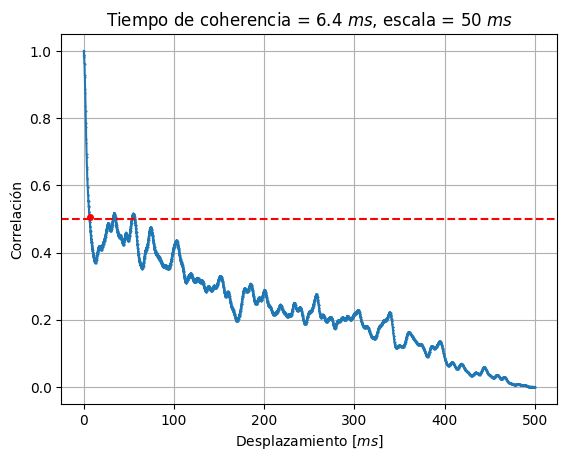

In [62]:
#%% Leer la cantidad de picos por pantalla completa
path_adicional = "Autocorrelacion_0Ohm_10V\\"
n= 1
n_file = 2 #elegir el archivo


file_name = ["Autocorrelacion_0Ohm_5ms","Autocorrelacion_0Ohm_25ms","Autocorrelacion_0Ohm_50ms","Autocorrelacion_0Ohm_100ms",
             "Autocorrelacion_0ohm_250ms","Autocorrelacion_0ohm_500ms","Autocorrelacion_0ohm_1000ms"]
tiempo_dato = [0.02,0.1,0.2,0.4,1,2,4]




data= np.array(np.loadtxt(path + path_adicional + file_name[n_file] + str(0) + ".txt"))*1000
ac = autocorr(data)

x = np.arange(len(data))*(tiempo_dato[n_file])
index = find_closest_index_min_concise(ac, 1/2)
tc= x[index]
index_manual = 32
tc_manual = x[index_manual]

plt.plot(x,ac,"-o",ms=.5)
plt.xlabel("Desplazamiento $[ms]$")
plt.ylabel("Correlación")
plt.title("Tiempo de coherencia = %s $ms$, escala = %i $ms$"%(round(tc_manual,4),tiempo_dato[n_file]*250))
plt.grid()
plt.plot(tc_manual,ac[index_manual],'ro',ms=4) 
plt.axhline(.5,ls="--",color="r")

plt.savefig(r"C:\Users\agus\OneDrive\Documentos\Github\General\Facultad\Materias que estoy cursando\Laboratorio 5\Práctica conteo\Figuras\autocorrelacion_0Ohm_10V_50ms")
#plt.xlim(0,10)
#CAPAZ PODRIAMOS SACARLE UAN FOTO AL PATRON DE SPECKLE Y VER CUANTO TARDA EN MOVERSE UN GRANO DEL TAMAÑO CARACTERÍSTICO 

##### 20V

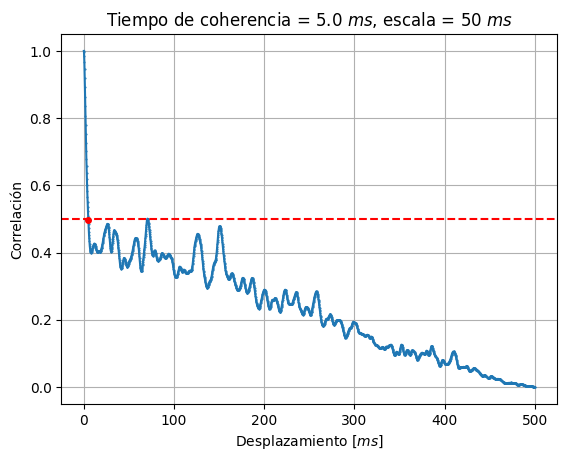

In [63]:

#%% Leer la cantidad de picos por pantalla completa
path_adicional = "Autocorrelacion_0Ohm_20V\\"
n= 0
n_file = 3 #elegir el archivo


file_name = ["0Ohm_164grados_5ms_20V_","0Ohm_164grados_10ms_20V_","0Ohm_164grados_25ms_20V_",
             "0Ohm_164grados_50ms_20V_","0Ohm_164grados_250ms_20V_","0Ohm_164grados_500ms_20V_",
             "0Ohm_164grados_1s_20V_"]
tiempo_dato = [0.02,0.04,0.1,0.2,1,2,4]

data= np.array(np.loadtxt(path + path_adicional + file_name[n_file] + str(0) + ".txt"))*1000
ac = autocorr(data)

x = np.arange(len(data))*(tiempo_dato[n_file])
index = find_closest_index_min_concise(ac, 1/2)
tc= x[index]
index_manual = 25
tc_manual = x[index_manual]


plt.plot(x,ac,"-o",ms=.5)
plt.xlabel("Desplazamiento $[ms]$")
plt.ylabel("Correlación")
plt.title("Tiempo de coherencia = %s $ms$, escala = %i $ms$"%(round(tc_manual,4),tiempo_dato[n_file]*250))
plt.grid()
plt.plot(tc_manual,ac[index_manual],'ro',ms=4) 

plt.axhline(1/2,ls="--",color="r")
#plt.xlim(4,6)

plt.savefig(r"C:\Users\agus\OneDrive\Documentos\Github\General\Facultad\Materias que estoy cursando\Laboratorio 5\Práctica conteo\Figuras\autocorrelacion_0Ohm_20V_50ms")

#CAPAZ PODRIAMOS SACARLE UAN FOTO AL PATRON DE SPECKLE Y VER CUANTO TARDA EN MOVERSE UN GRANO DEL TAMAÑO CARACTERÍSTICO 0Ohm_164grados_1s_20V_0

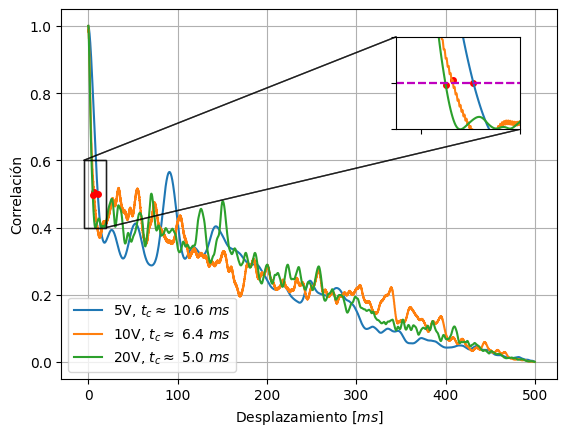

In [53]:
file_name = ["Autocorrelacion_0Ohm_5V\\Autocorrelacion_0ohm_50ms0","Autocorrelacion_0Ohm_10V\\Autocorrelacion_0Ohm_50ms0","Autocorrelacion_0Ohm_20V\\0Ohm_164grados_50ms_20V_0"]


voltajes = ["5V","10V","20V"]
index = [53,32,25]

x = np.arange(2500)*.2
fig,ax = plt.subplots()
x1,x2,y1,y2 = -5,20,0.4,0.6
axins = ax.inset_axes(
[0.675, 0.675, 0.25, 0.25],
xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

for i in enumerate(file_name):
    data= np.array(np.loadtxt(path + str(i[1])+ ".txt"))*1000
    ac = autocorr(data)
    ax.plot(x,ac,label=r"%s, $t_c \approx$ %s $ms$"%(voltajes[i[0]],round(x[index[i[0]]],4)))
    ax.plot(x[index[i[0]]],ac[index[i[0]]],'ro',ms=4) 
    ax.set_xlabel("Desplazamiento $[ms]$")
    ax.set_ylabel("Correlación")
    ax.legend()
    ax.grid()
    axins.plot(x[index[i[0]]],ac[index[i[0]]],'ro',ms=4) 
    axins.plot(x,ac)
    axins.axhline(1/2,ls="--",color="m")
    ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig(path_fig +"Autocorrelacion/"+ "autocorrelacion_comparación.png",bbox_inches="tight")

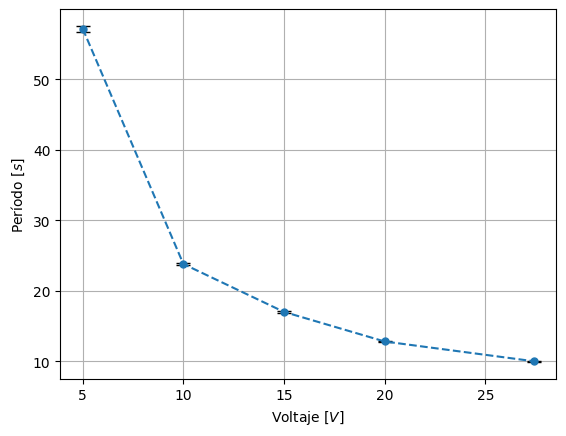

In [54]:
#Velocidad del disco 

t_d = [57.2,23.8,17,12.8,10]
t_d_err = [.4,.2,.1,.1,.1]
v_d = [5,10,15,20,27.4]

plt.errorbar(v_d,t_d,yerr=t_d_err,ls="--",marker="o",markersize=5, capsize=5, capthick=1, ecolor='black')
plt.xlabel("Voltaje $[V]$")
plt.ylabel("Período $[s]$")
plt.grid()

plt.savefig(path_fig +"Autocorrelacion/"+"velocidad_disco.png",bbox_inches="tight")

### Busco los picos

#### Datos de clase 5


In [94]:
#%% Leer la cantidad de picos por pantalla completa
#n= 1000
n_file = 1 #elegir el archivo
n_pantalla = 0 #elegir cuánto de pantalla, completa, 1/2,1/4 o 1/8
n=955 #para 15V

file_name = ["Datos 50Ohms 10us 194º 5V ROTANTE\\pantalla_completa_194grados_Rueda5V_10um_resistencia_50_Ohm_",
             "Datos 50Ohms 10us 194º 15V ROTANTE\\pantalla_completa_194grados_Rueda15V_10um_resistencia_50_Ohm_"
             ]

pantalla = [1,2,4,8]

data = []
cantidad_picos = []
for i in range(n):
    data_i = np.array(np.loadtxt(path + file_name[n_file] + str(i) + ".txt"))*1000
    picos_i, _ = find_peaks(-data_i[:int(len(data_i)/pantalla[n_pantalla])],distance=10,height=3.2) 
    data.append(data_i)
    cantidad_picos.append(len(picos_i))
print(np.sum(cantidad_picos))

data = np.concatenate(data,axis=0)

666


0.01064913894644062
0.03099241902845416
0.04270903534200549
0.07533475619144184
3.233430786755088
47.56297393768768
195.85092725532894
196.85092725532894
2299395.078512781
385695770.33451605
0.004581292960953403
0.05742045050764777
0.0647547578393932
0.2545097020397306
0.28995658525146867
0.34761404232426835
0.7446404265841128
1.744640426584113
3.1638326934429175
21.942846351288928
2.2345659841233196
6.065055961369319
6.804658510454889
7.325697300539434
9.920093703457885
11.762049958325083
12.178249067197905
12.664968927009788
13.152281201052629
1.346002756900857
6.181143777447804
6.493518518251929
12.880665017320268
13.221507396737994
13.46483243202185
14.879007291487238
15.023049521713588
15.34478859561692


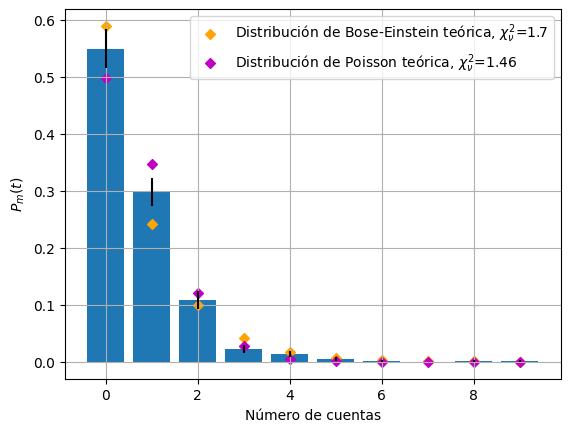

In [96]:
#%% cantidad de picos por pantalla completa analisis BOSE-EINSTEIN

#En B-E se cumple que la varianza es Var = valor_medio*(1+valor_medio)

bins = np.arange(min(cantidad_picos),max(cantidad_picos)+1,1) - 0.5

valor_medio = np.mean(cantidad_picos)
varianza = np.var(cantidad_picos)
varianza_aprox = valor_medio*(1+valor_medio)
cuentas, bins_edges = np.histogram(cantidad_picos, bins=bins, density=True)
x_be = np.arange(min(cantidad_picos),max(cantidad_picos),1)
y_be = f(x_be, valor_medio)

x_poisson = np.arange(min(cantidad_picos),max(cantidad_picos),1)
y_poisson = poisson.pmf(x_poisson, valor_medio)

n_i = np.histogram(cantidad_picos, bins=bins)[0]
n_t = np.sum(cantidad_picos)
errores_barras_p = np.sqrt(n_i)/(n_t) 
errores_barras_b = np.sqrt(n_i)/n_t

chi_p = chisqr(cuentas,y_poisson)
chi_b = chisqr(cuentas,y_be)
chi_red_p = chisqr_reduced_error(cuentas,y_poisson,errores_barras_p,1) #Poisson
chi_red_b = chisqr_reduced_error(cuentas,y_be,errores_barras_p,1) #BE


plt.figure()
#plt.title(r"<m> = %s, Var = %s, <m>(1+<m>) = %s"%(round(valor_medio,2),round(varianza,4),round(varianza_aprox,4)))
plt.bar(x_be, cuentas,yerr = errores_barras_b)
plt.scatter(x_be, y_be,marker="D",s=25,color="orange",label=r"Distribución de Bose-Einstein teórica, $\chi^{2}_{\nu}$=%s"%round(chi_red_b,2))
plt.scatter(x_poisson, y_poisson,marker="D",s=25,color="m",label=r"Distribución de Poisson teórica, $\chi^{2}_{\nu}$=%s"%round(chi_red_p,2))
plt.xlabel("Número de cuentas")
plt.ylabel("$P_m(t)$")
plt.legend()
plt.grid()

plt.savefig(path_fig + "Bose-Einstein/"+ "Histograma_cuentas_164_10us_15V_completo.png",bbox_inches="tight")

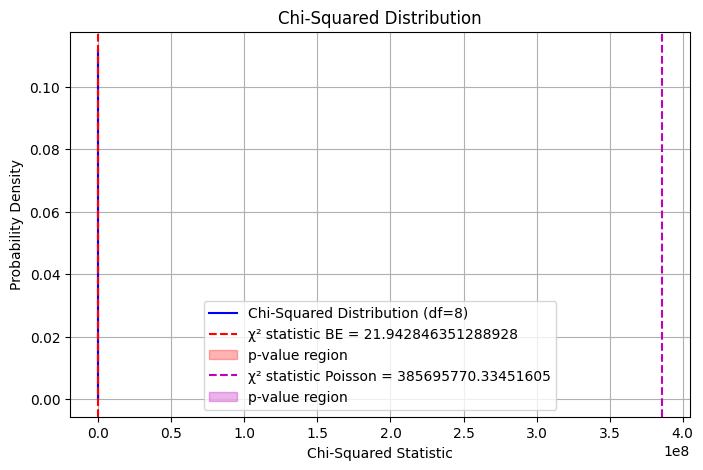

Chi-Squared Statistic BE: 21.942846351288928
Chi-Squared Statistic Poisson: 385695770.33451605
Degrees of Freedom: 8
P-value_b: 0.005022851754108071
P-value_p: 0.0


In [97]:
# Define degrees of freedom (df = number of bins - 1 - estimated parameters)
df = len(cuentas)-1-1  # Example, adjust based on your data

# Generate x values (Chi-Squared range)
x = np.linspace(0, 50   , 500)

# Compute Chi-Squared PDF
chi2_pdf = stats.chi2.pdf(x, df)

# Compute a sample chi-squared statistic (replace with your computed value)
chi2_stat_b = chi_b  # Example value, replace with your own
chi2_stat_p = chi_p  # Example value, replace with your own

# Plot Chi-Squared distribution
plt.figure(figsize=(8, 5))
plt.plot(x, chi2_pdf, label=f"Chi-Squared Distribution (df={df})", color='blue')
plt.axvline(chi2_stat_b, color='red', linestyle="dashed", label=f"χ² statistic BE = {chi2_stat_b}")
plt.fill_between(x, chi2_pdf, where=(x > chi2_stat_b), color='red', alpha=0.3, label="p-value region")

plt.axvline(chi2_stat_p, color='m', linestyle="dashed", label=f"χ² statistic Poisson = {chi2_stat_p}")
plt.fill_between(x, chi2_pdf, where=(x > chi2_stat_p), color='m', alpha=0.3, label="p-value region")

# Labels and legend
plt.xlabel("Chi-Squared Statistic")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution")
plt.legend()
plt.grid()

# Show plot
plt.show()

# Compute p-value
p_value_b = stats.chi2.sf(chi2_stat_b, df)
p_value_p = stats.chi2.sf(chi2_stat_p, df)

print(f"Chi-Squared Statistic BE: {chi2_stat_b}")
print(f"Chi-Squared Statistic Poisson: {chi2_stat_p}")
print(f"Degrees of Freedom: {df}")
print(f"P-value_b: {p_value_b}")
print(f"P-value_p: {p_value_p}")

#### Datos de clase 6

In [108]:
#%% Leer la cantidad de picos por pantalla completa
n= 1000
n_file = 1 #elegir el archivo
n_pantalla = 0 #elegir cuánto de pantalla, completa, 1/2,1/4 o 1/8

file_name = ["50Ohms_164grados_10us_disco20V\\pantalla_completa_164grados_Rueda20V_10um_resistencia_50_Ohm_",
             "50Ohms_164grados_1ms_disco20V\\50Ohm_164grados_1ms_",
             "50Ohms_164grados_100ms_disco20V\\pantalla_completa_164grados_Rueda20V_100ms_resistencia_50_Ohm_",
             "50Ohms_194grados_10us_disco10V\\pantalla_completa_194grados_Rueda10V_10um_resistencia_50_Ohm_"]

pantalla = [1,2,4,8]

data = []
cantidad_picos = []
for i in range(n):
    data_i = np.array(np.loadtxt(path + file_name[n_file] + str(i) + ".txt"))*1000
    picos_i, _ = find_peaks(-data_i[:int(len(data_i)/pantalla[n_pantalla])],distance=10,height=3.2) 
    data.append(data_i)
    cantidad_picos.append(len(picos_i))
print(np.sum(cantidad_picos))

data = np.concatenate(data,axis=0)

print(file_name[n_file])

3256
50Ohms_164grados_1ms_disco20V\50Ohm_164grados_1ms_


840.0014405836375
1110.1133019040462
1121.6702267049625
1651.4633848185317
2306.3349422346337
2557.598506568177
2649.808449724922
2658.560573624184
2674.2153491525823
2785.1142468952517
2885.0913277095997
2951.3463345150963
3023.890180528435
3108.9483609235967
3140.9317696225467
3183.734401638994
3226.5615452224374
3247.9770491400554
3258.685363759762
582.1825761318347
596.4943762522228
750.6902175990347
836.8322942395226
883.2096897608449
910.1321225176935
912.140245016429
962.6505848573461
1031.2225626593718
1036.533200241596
1051.2167568062152
1093.9252197676371
1102.7187048439016
1103.5980485654995
1125.9111041447975
1126.0267895880374
1127.6589366610308
1128.80570124899
1130.8923563597773
840.0014405836375
1110.1133019040462
1121.6702267049625
1651.4633848185317
2306.3349422346337
2557.598506568177
2649.808449724922
2658.560573624184
2674.2153491525823
2785.1142468952517
2885.0913277095997
2951.3463345150963
3023.890180528435
3108.9483609235967
3140.9317696225467
3183.734401638994

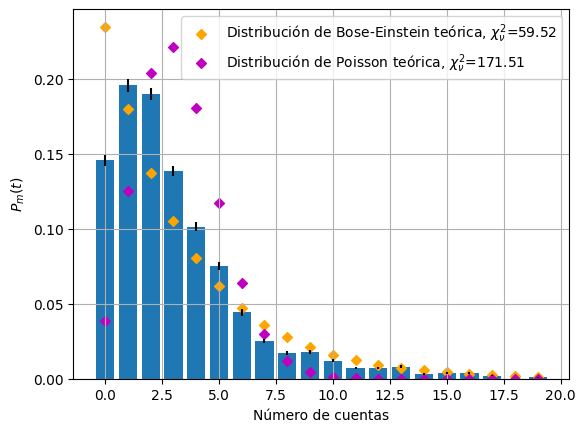

In [109]:
#%% cantidad de picos por pantalla completa analisis BOSE-EINSTEIN

#En B-E se cumple que la varianza es Var = valor_medio*(1+valor_medio)

bin_max = np.max(cantidad_picos)
bin_max = 20


bins = np.arange(min(cantidad_picos),bin_max+1,1) - 0.5

valor_medio = np.mean(cantidad_picos)
varianza = np.var(cantidad_picos)
varianza_aprox = valor_medio*(1+valor_medio)
cuentas, bins_edges = np.histogram(cantidad_picos, bins=bins, density=True)
x_be = np.arange(min(cantidad_picos),bin_max,1)
y_be = f(x_be, valor_medio)

x_poisson = np.arange(min(cantidad_picos),bin_max,1)
y_poisson = poisson.pmf(x_poisson, valor_medio)

n_i = np.histogram(cantidad_picos, bins=bins)[0]
n_t = np.sum(cantidad_picos)
errores_barras_p = np.sqrt(n_i)/(n_t) 
errores_barras_b = np.sqrt(n_i)/n_t



chi_p = chisqr_error(cuentas,y_poisson,errores_barras_p)
chi_b = chisqr_error(cuentas,y_be,errores_barras_b)
chi_red_p = chisqr_reduced_error(cuentas,y_poisson,errores_barras_p,1) #Poisson
chi_red_b = chisqr_reduced_error(cuentas,y_be,errores_barras_b,1) #BE


plt.figure()
#plt.title(r"<m> = %s, Var = %s, <m>(1+<m>) = %s"%(round(valor_medio,2),round(varianza,4),round(varianza_aprox,4)))
plt.bar(x_be, cuentas,yerr = errores_barras_b)
plt.scatter(x_be, y_be,marker="D",s=25,color="orange",label=r"Distribución de Bose-Einstein teórica, $\chi^{2}_{\nu}$=%s"%round(chi_red_b,2))
plt.scatter(x_poisson, y_poisson,marker="D",s=25,color="m",label=r"Distribución de Poisson teórica, $\chi^{2}_{\nu}$=%s"%round(chi_red_p,2))
plt.xlabel("Número de cuentas")
plt.ylabel("$P_m(t)$")
plt.legend()
plt.grid()

#plt.savefig(path_fig + "Bose-Einstein/"+ "Histograma_cuentas_164_100ms_20V_completo.png",bbox_inches="tight")

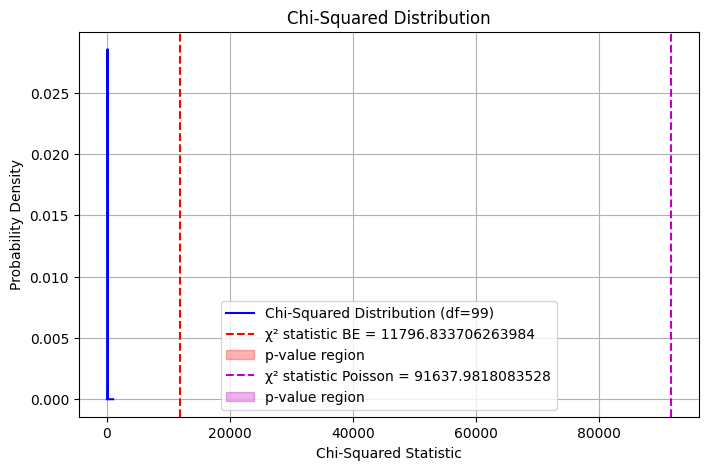

Chi-Squared Statistic BE: 11796.833706263984
Chi-Squared Statistic Poisson: 91637.9818083528
Degrees of Freedom: 99
P-value_b: 0.0
P-value_p: 0.0


In [39]:
# Define degrees of freedom (df = number of bins - 1 - estimated parameters)
df = len(cuentas)-1-1  # Example, adjust based on your data

# Generate x values (Chi-Squared range)
x = np.linspace(0, 1000, 500)

# Compute Chi-Squared PDF
chi2_pdf = stats.chi2.pdf(x, df)

# Compute a sample chi-squared statistic (replace with your computed value)
chi2_stat_b = chi_b  # Example value, replace with your own
chi2_stat_p = chi_p  # Example value, replace with your own

# Plot Chi-Squared distribution
plt.figure(figsize=(8, 5))
plt.plot(x, chi2_pdf, label=f"Chi-Squared Distribution (df={df})", color='blue')
plt.axvline(chi2_stat_b, color='red', linestyle="dashed", label=f"χ² statistic BE = {chi2_stat_b}")
plt.fill_between(x, chi2_pdf, where=(x > chi2_stat_b), color='red', alpha=0.3, label="p-value region")

plt.axvline(chi2_stat_p, color='m', linestyle="dashed", label=f"χ² statistic Poisson = {chi2_stat_p}")
plt.fill_between(x, chi2_pdf, where=(x > chi2_stat_p), color='m', alpha=0.3, label="p-value region")

# Labels and legend
plt.xlabel("Chi-Squared Statistic")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution")
plt.legend()
plt.grid()

# Show plot
plt.show()

# Compute p-value
p_value_b = stats.chi2.sf(chi2_stat_b, df)
p_value_p = stats.chi2.sf(chi2_stat_p, df)

print(f"Chi-Squared Statistic BE: {chi2_stat_b}")
print(f"Chi-Squared Statistic Poisson: {chi2_stat_p}")
print(f"Degrees of Freedom: {df}")
print(f"P-value_b: {p_value_b}")
print(f"P-value_p: {p_value_p}")

0.00902620182940294
0.02111348299276952
0.028211640968911742
0.031971957111477364
0.046516999655369325
0.05232048544617375
0.07548485599586251
0.1336460209066746
0.17290807200492517
0.18266993398364706
0.18582381430761294
0.19493893544455712
0.20060516764612427
0.2652460670671782
0.2755081382880363
0.30797201666230045
0.381210561811472
0.3914503230710628
0.3922240143796803
0.45070858300090166
0.577389767296314
0.7334180903471963
0.8984566333793359
0.6447045321074624 0.3746619329702365


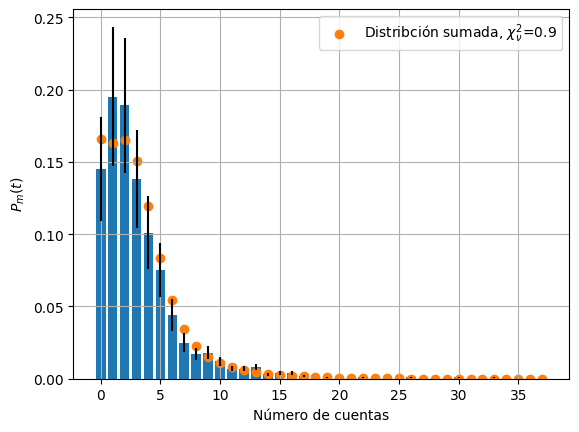

In [ ]:
def dist_mixta(dist,w_1,w_2): 
    dist_1,dist_2 = dist
    return w_1*dist_1 + w_2*dist_2

popt, pcov = curve_fit(dist_mixta,[y_be,y_poisson],cuentas)
test = dist_mixta([y_be,y_poisson],*popt)
error_barras_suma = np.sqrt(popt[0]*errores_barras_b**2+popt[1]*errores_barras_p**2)

chi_red_s = chisqr_reduced(cuentas,test,error_barras_suma,1) #Dist sumada
 
print(*popt)

plt.bar(x_be, cuentas,yerr = error_barras_suma)
plt.scatter(x_be,test,label=r"Distribción sumada, $\chi^2_{\nu}$=%s"%round(chi_red_s,2))
plt.xlabel("Número de cuentas")
plt.ylabel("$P_m(t)$")
plt.legend()
plt.grid()

plt.savefig(path_fig + "Bose-Einstein/"+ "Histograma_cuentas_164_1ms_20V_completo_Dist_sumada.png",bbox_inches="tight")